# Extracting Language Data from Various Sources

Introduction to NLP for Data Science. Week 1

## PDF Import

In [1]:
import PyPDF2
import warnings
warnings.filterwarnings('ignore')

In [2]:
pdfFileObject = open('test.pdf','rb')

In [3]:
pdfReaderObject = PyPDF2.PdfFileReader(pdfFileObject)
print(pdfReaderObject.numPages)

1


In [11]:
firstPageObject = pdfReaderObject.getPage(0)
#print(firstPageObject.extractText())

Extract all text for processing

In [5]:
pdf_data = ""
number_of_pages = pdfReaderObject.numPages
for page_number in range(number_of_pages):   # use xrange in Py2
    page = pdfReaderObject.getPage(page_number)
    page_content = page.extractText()
    pdf_data+=page_content

In [7]:
pdf_data = []
number_of_pages = pdfReaderObject.numPages
for page_number in range(number_of_pages):   # use xrange in Py2
    page = pdfReaderObject.getPage(page_number)
    page_content = page.extractText()
    pdf_data.append(page_content)
' '.join(pdf_data)

" \nLorem Ipsum\n \nis simply dummy text of the printing and typesetting industry. Lorem Ipsum has been \nthe industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of \ntype and scrambled it to make a type specimen book. It has survived not o\nnly five centuries, but also \nthe leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s \nwith the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop \npublishing software like\n \nAldus PageMaker including versions of Lorem Ipsum.\n \nWhy do we use it?\n \nIt is a long established fact that a reader will be distracted by the readable content of a page when \nlooking at its layout. The point of using Lorem Ipsum is that it has a more\n-\nor\n-\nless \nnormal distribution \nof letters, as opposed to using 'Content here, content here', making it look like readable English. Many \ndesktop publishing packages and web page editors

In [22]:
pdfFileObject.close()

In [24]:
#pdf_data

## JSON Documents

In [9]:
import requests
import json

In [10]:
r = requests.get("https://quotes.rest/qod.json") # Note your quore result will be different
res = r.json()
print(json.dumps(res, indent = 4))

{
    "success": {
        "total": 1
    },
    "contents": {
        "quotes": [
            {
                "quote": "Your time is limited, so don't waste it living someone else's life. Don't be trapped by dogma - which is living with the results of other people's thinking. Don't let the noise of other's opinions drown out your own inner voice. And most important, have the courage to follow your heart and intuition. They somehow already know what you truly want to become. Everything else is secondary.",
                "length": "388",
                "author": "Steve Jobs",
                "tags": [
                    "inspire",
                    "life",
                    "time",
                    "tod",
                    "truth",
                    "tso-top-100"
                ],
                "category": "inspire",
                "language": "en",
                "date": "2020-08-11",
                "permalink": "https://theysaidso.com/quote/steve-jobs-your-time-

In [11]:
#extract contents
q = res['contents']['quotes'][0]

In [13]:
q

{'quote': "Your time is limited, so don't waste it living someone else's life. Don't be trapped by dogma - which is living with the results of other people's thinking. Don't let the noise of other's opinions drown out your own inner voice. And most important, have the courage to follow your heart and intuition. They somehow already know what you truly want to become. Everything else is secondary.",
 'length': '388',
 'author': 'Steve Jobs',
 'tags': ['inspire', 'life', 'time', 'tod', 'truth', 'tso-top-100'],
 'category': 'inspire',
 'language': 'en',
 'date': '2020-08-11',
 'permalink': 'https://theysaidso.com/quote/steve-jobs-your-time-is-limited-so-dont-waste-it-living-someone-elses-life-dont',
 'id': 'RmGoiti7Oqz4LFSHrM_dIAeF',
 'background': 'https://theysaidso.com/img/qod/qod-inspire.jpg',
 'title': 'Inspiring Quote of the day'}

In [12]:
print(q['quote'], '\n--', q['author'])

Your time is limited, so don't waste it living someone else's life. Don't be trapped by dogma - which is living with the results of other people's thinking. Don't let the noise of other's opinions drown out your own inner voice. And most important, have the courage to follow your heart and intuition. They somehow already know what you truly want to become. Everything else is secondary. 
-- Steve Jobs


## HTML Import

In [15]:
import urllib.request as urllib3
from bs4 import BeautifulSoup

In [16]:
response = urllib3.urlopen('https://en.wikipedia.org/wiki/Natural_language_processing')
html_doc = response.read()

In [18]:
soup = BeautifulSoup(html_doc, 'html.parser')
strhtm = soup.prettify()
print(strhtm[:1000])

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Natural language processing - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"f6b1cf01-343e-4415-ada2-7fa2bdd0e4d5","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Natural_language_processing","wgTitle":"Natural language processing","wgCurRevisionId":971205596,"wgRevisionId":971205596,"wgArticleId":21652,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: location","Wikipedia articles needing clarification from October 2019","All accuracy disputes","Arti

In [21]:
print(soup.title)
print(soup.title.string)
#for x in soup.find_all('p'): print(x.text)

<title>Natural language processing - Wikipedia</title>
Natural language processing - Wikipedia


## Tweeter API

In [25]:
import numpy as np
import tweepy
import json
import pandas as pd
from tweepy import OAuthHandler

In [31]:
# credentials [type your credentials between quotes]
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

In [32]:
# calling API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [33]:
# Provide the query you want to search.
query ="ABC"

In [34]:
#home timeline, print each tweets text. Your results will be different
public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

RT @JoeBiden: Don't forget that in the middle of this pandemic, the Trump Administration is in court trying to eliminate Obamacare and rip…
RT @pjlucky57: This is a strong combination and will return us to the nation we should be.  My vote is #BidenHarris2020 and can’t wait to p…
"Writing fanfiction allowed them to explore much of their own complicated feelings about gender and queerness." https://t.co/Gfhp9LOHtM
By examining news narrative and sentiment, you can get a pretty good idea of the current trajectory of the state of… https://t.co/YdPJn8KwaL
RT @ericweiskott: one thing you just gotta love about Middle English is the plethora of words for 'rebuke'

REBUKEN, yes,

but also

ARATEN…
Android users in California will now get an earthquake warning from Google before they feel any shaking https://t.co/80FOflLvP6
Humans are basically good: A hopeful look at history and our future https://t.co/o8wTSHNAZJ
RT @willsommer: QAnon believer Marjorie Taylor Greene wins a GOP House nomination

In [45]:
#public_tweets[0]
status = public_tweets[0]
json_str = json.dumps(status._json)
parsed = json.loads(json_str)
#print(json.dumps(parsed, indent=4, sort_keys=True))

In [41]:
status.text

"RT @JoeBiden: Don't forget that in the middle of this pandemic, the Trump Administration is in court trying to eliminate Obamacare and rip…"

In [55]:
# Fetching tweets with the query "ABC"
for tweet in tweepy.Cursor(api.search,
                           q="ABC",
                           rpp=100,
                           result_type="recent",
                           include_entities=True,
                           lang="en").items(5):
    print(tweet.text)

@sarahcpr @JimmyKimmelLive @RedHourBen @ABC Whaaaa.....
Nice shot
Good luck
Congrats
RT @Wontawn_soup: *doesnt show the peaceful protests for 2 months*

...
RT @AltoCarol: He's not suing "the government" ABC - he's suing everyone in WA. Their schools, their hospitals, their services. 
A whole ye…
RT @angelinadivine_: what they forgot to mention was CPD shot a 15 year old
@Fletchulator @marxdeane @ConversationEDU Well 10% probably work for ABC so they are #Buttrosed 

It’s the 5%, our… https://t.co/Yv6xzfqdJ3


## Google Trends

In [3]:
# !pip install pytrends #uncomment if you need to install it

In [4]:
import pandas as pd
from pytrends.request import TrendReq
pytrend = TrendReq()

In [5]:
keywords = ['Python', 'R'] # select your own keywords

In [13]:
pytrend.build_payload(kw_list = keywords, timeframe='2020-07-28 2020-08-29', geo='US') # select your timeframe

In [23]:
df = pytrend.interest_over_time()
#df.columns = df.columns.droplevel(0) #drop outside header
df = df.drop('isPartial', axis = 1) # drop column isPartial
df.reset_index(level=0,inplace=True) #reset_index
df.columns=['date','Python','R']
df.head()

,date,Python,R
0,2020-07-28,58,83
1,2020-07-29,61,84
2,2020-07-30,56,82
3,2020-07-31,48,79
4,2020-08-01,31,80


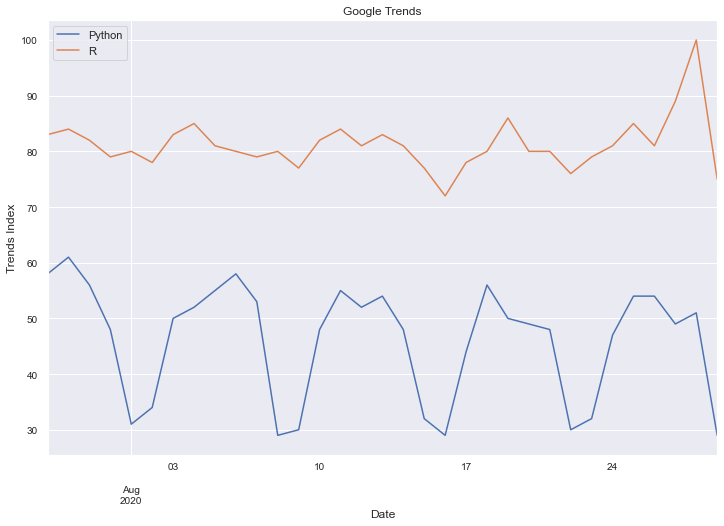

In [24]:
import seaborn as sns
sns.set(color_codes=True)
fig = df.plot(figsize = (12,8),x="date", y=['Python','R'], kind="line", title = "Google Trends")
fig.set_xlabel('Date')
fig.set_ylabel('Trends Index')
fig.tick_params(axis='both', which='both', labelsize=10)

In [25]:
pytrend.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)

,Python,R
geoName,,
Alabama,28,72
Alaska,32,68
Arizona,32,68
Arkansas,23,77
California,51,49
Colorado,37,63
Connecticut,35,65
Delaware,25,75
District of Columbia,35,65
